# Exploring the data

In [6]:
# Data content

"""

- age : age of primary beneficiary

- sex : insurance contractor gender, female, male

bmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height

- objective index of body weight (kg/m ^2) using the ratio of height to weight, ideally 18.5 to 24.9

- children :  Number of children covered by health insurance / Number of dependents.

- smoker : Smoking

- region : the beneficiary's residential area in the US, northeast, southeast, southwest, nothwest.

- charges : individual medical costs billed by health insurance.

"""



"\n\n- age : age of primary beneficiary\n\n- sex : insurance contractor gender, female, male\n\nbmi : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height\n\n- objective index of body weight (kg/m ^2) using the ratio of height to weight, ideally 18.5 to 24.9\n\n- children :  Number of children covered by health insurance / Number of dependents.\n\n- smoker : Smoking\n\n- region : the beneficiary's residential area in the US, northeast, southeast, southwest, nothwest.\n\n- charges : individual medical costs billed by health insurance.\n\n"

In [7]:
!pip install xgboost

In [8]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
pd.set_option('compute.use_bottleneck', False)

In [15]:
# import the dataset
data = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Bureau\medical_data.csv')

#  EDA

In [85]:
print(" The shape of the data  : ", data.shape)

 The shape of the data  :  (1338, 8)


In [86]:
# Display the first ten rows  :

print("\n The first ten rows :\n")
print(data.head(10))


 The first ten rows :

   age     sex     bmi  children smoker     region      charges  log_charges
0   19  female  27.900         0    yes  southwest  16884.92400     4.227499
1   18    male  33.770         1     no  southeast   1725.55230     3.236928
2   28    male  33.000         3     no  southeast   4449.46200     3.648308
3   33    male  22.705         0     no  northwest  21984.47061     4.342116
4   32    male  28.880         0     no  northwest   3866.85520     3.587358
5   31  female  25.740         0     no  southeast   3756.62160     3.574797
6   46  female  33.440         1     no  southeast   8240.58960     3.915958
7   37  female  27.740         3     no  northwest   7281.50560     3.862221
8   37    male  29.830         2     no  northeast   6406.41070     3.806615
9   60  female  25.840         0     no  northwest  28923.13692     4.461245


In [87]:
# Extract information about the data

print("\n Information about the data : \n")
print(data.info())


 Information about the data : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   log_charges  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB
None


In [88]:
# Check if there are any missing values

print("\nThe total number of missing values for each variable is :\n")
print(data.isnull().sum())


The total number of missing values for each variable is :

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
log_charges    0
dtype: int64


#  Univariate analysis

In [89]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Numerical values :\n")
print(numerical_cols)
print("\ncategorical values :\n")
print(categorical_cols)

Numerical values :

Index(['age', 'bmi', 'children', 'charges', 'log_charges'], dtype='object')

categorical values :

Index(['sex', 'smoker', 'region'], dtype='object')


In [90]:
print("\nSummary of numerical data :\n")
print(data[numerical_cols].describe())


Summary of numerical data :

               age          bmi     children       charges  log_charges
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.663397     1.094918  13270.422265     3.951497
std      14.049960     6.098187     1.205493  12110.011237     0.399346
min      18.000000    15.960000     0.000000   1121.873900     3.049944
25%      27.000000    26.296250     0.000000   4740.287150     3.675805
50%      39.000000    30.400000     1.000000   9382.033000     3.972297
75%      51.000000    34.693750     2.000000  16639.912515     4.221150
max      64.000000    53.130000     5.000000  63770.428010     4.804619


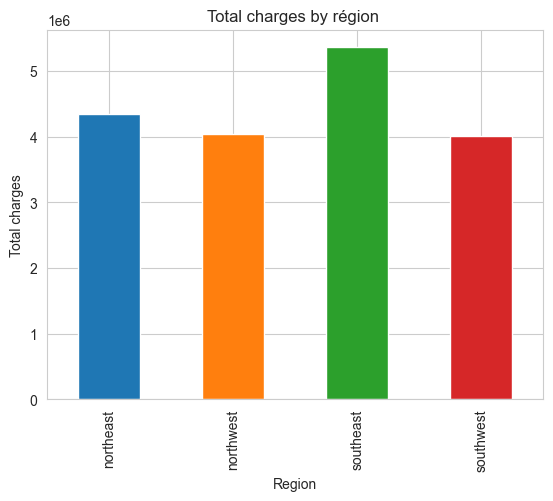

In [92]:
palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

charge_by_region = data.groupby('region')['charges'].sum()
charge_par_region.plot(kind='bar',title= "Total charges by région ", color = palette)
plt.xlabel('Region')
plt.ylabel('Total charges')
plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


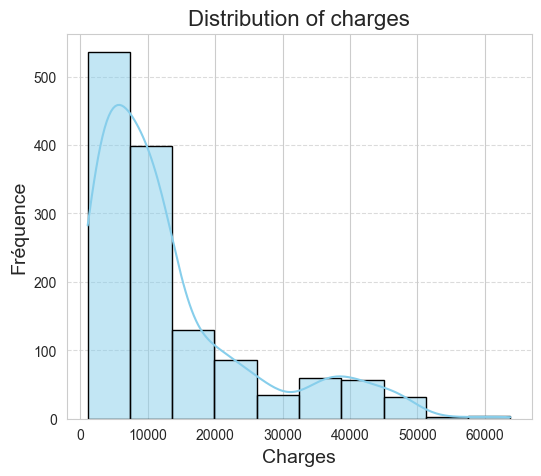

In [94]:
# Analyse the target variable ( Charges)
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))  
sns.histplot(data['charges'], kde=True, color='skyblue', bins=10, edgecolor='black')
plt.title('Distribution of charges', fontsize=16)
plt.xlabel('Charges', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


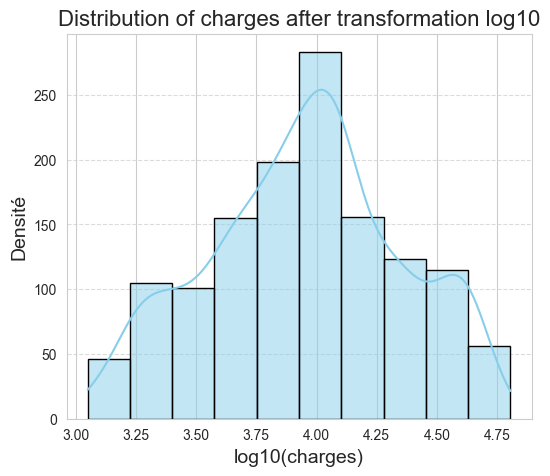

In [95]:
# Apply a base 10 logarithmic transformation
data['log_charges'] = np.log10(data['charges'])
plt.figure(figsize=(6, 5))
sns.histplot(data['log_charges'], kde=True, color='skyblue', bins=10, edgecolor='black')
plt.title('Distribution of charges after transformation log10', fontsize=16)
plt.xlabel('log10(charges)', fontsize=14)
plt.ylabel('Densité', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyse Bivariée et Multivariée

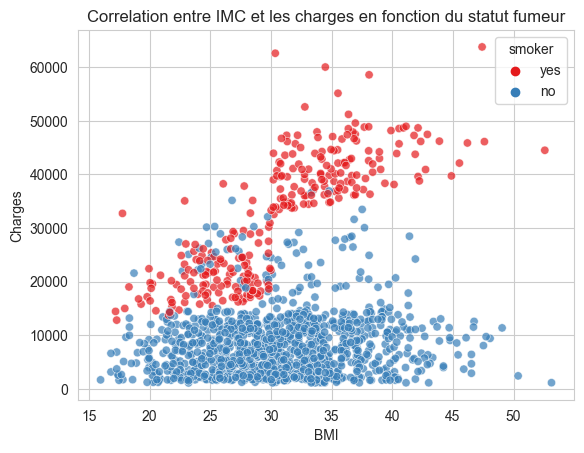

In [96]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data, palette='Set1', alpha=0.7)


plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title("Correlation entre IMC et les charges en fonction du statut fumeur")
plt.show()

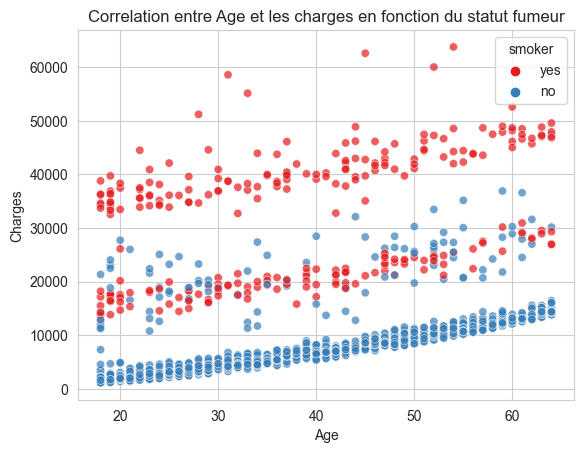

In [25]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, palette='Set1', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title("Correlation entre Age et les charges en fonction du statut fumeur")
plt.show()

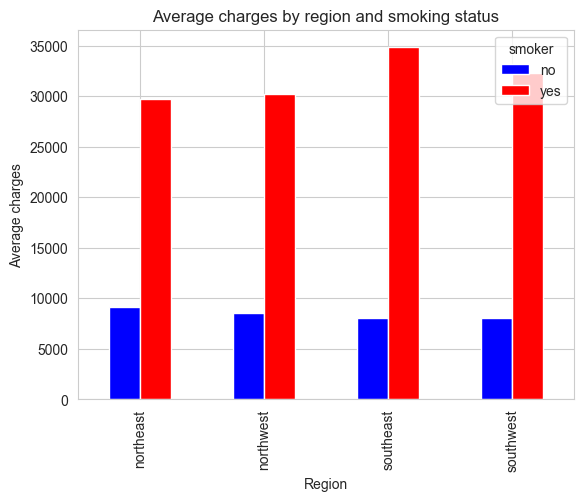

In [99]:
# Average charges by region and smoking status (smoker/non-smoker)

charges_smoker_region = data.groupby(['region', 'smoker'])['charges'].mean().unstack()
charges_smoker_region.plot(kind='bar', title='Average charges by region and smoking status', color=['blue', 'red'])
plt.xlabel('Region')
plt.ylabel('Average charges')
plt.legend(title='smoker')
plt.show()

In [100]:
# Select numerical values
numerical_col = data[['age', 'bmi', 'children', 'charges']]

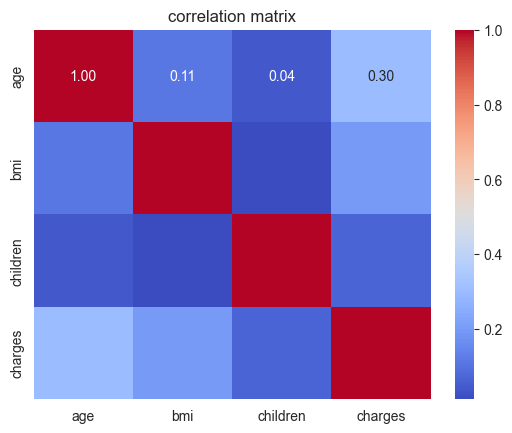

In [101]:
corr_matrix = numerical_col.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()

# Data Preprocessing

# Dummy Variable Encoding

As observed in the correlation analysis above, it only shows the correlation between numerical variables.

More importantly, all input data used to build a regression model must be numerical.

Therefore, it is necessary to transform categorical data (such as those in the columns region, sex, smoker) into numerical equivalents before training a machine learning model.

To facilitate this transformation from categorical text data to numerical data, we use a Pandas method called get_dummies.

The get_dummies method converts all categorical text data into numerical columns by creating a new column for each distinct category.

A value of 1 is assigned to observations that belong to that category, and a value of 0 is assigned to those that do not.

In [102]:
data_dummies = pd.get_dummies(data)
data_dummies_1 = data_dummies.drop(['log_charges'], axis=1)


In [104]:
# Dataset shape before and after encoding categorical variables
print("The shape of our dataset before encoding categorical variables is:", data.shape)
print("The shape of our dataset after encoding categorical variables is:", data_dummies_1.shape)

The shape of our dataset before encoding categorical variables is: (1338, 8)
The shape of our dataset after encoding categorical variables is: (1338, 12)


In [105]:
data_dummies_1.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


In [106]:
# Calculate the correlation between the predictive variables
correlation_matrix = data_dummies_1.corr()
correlation_with_charges = correlation_matrix['charges'].sort_values(ascending=False)

# Display the correlation between the independent variables (X) and the dependent variable (Y)
print("Correlation between independent variables and the target variable:\n", correlation_with_charges)

Correlation between independent variables and the target variable:
 charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
sex_female         -0.057292
smoker_no          -0.787251
Name: charges, dtype: float64


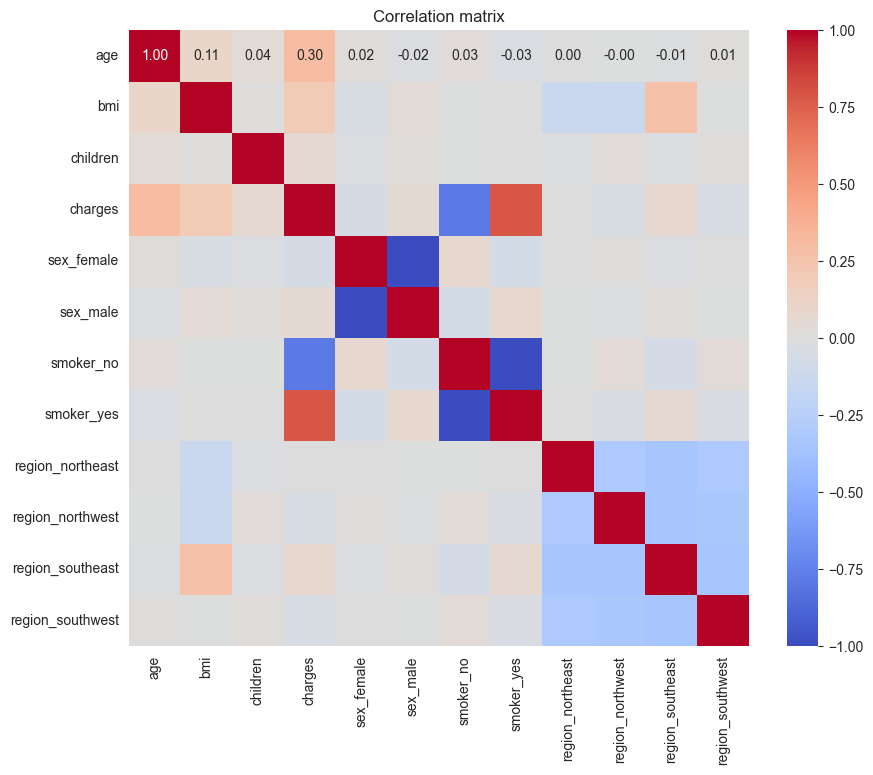

In [107]:
# Correlation matrix after encoding categorical data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

# Overall Correlation Analysis:

Most influential variable: Being a smoker (smoker_yes) is the factor most correlated with charges, with a correlation of 0.787251. This indicates that smoking is a major determinant of costs.

Secondary factors: Age and BMI also play an important role, but their influence is significantly lower than that of smoking.

Regional and other variables: Region and sex have a marginal or negligible influence on charges.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

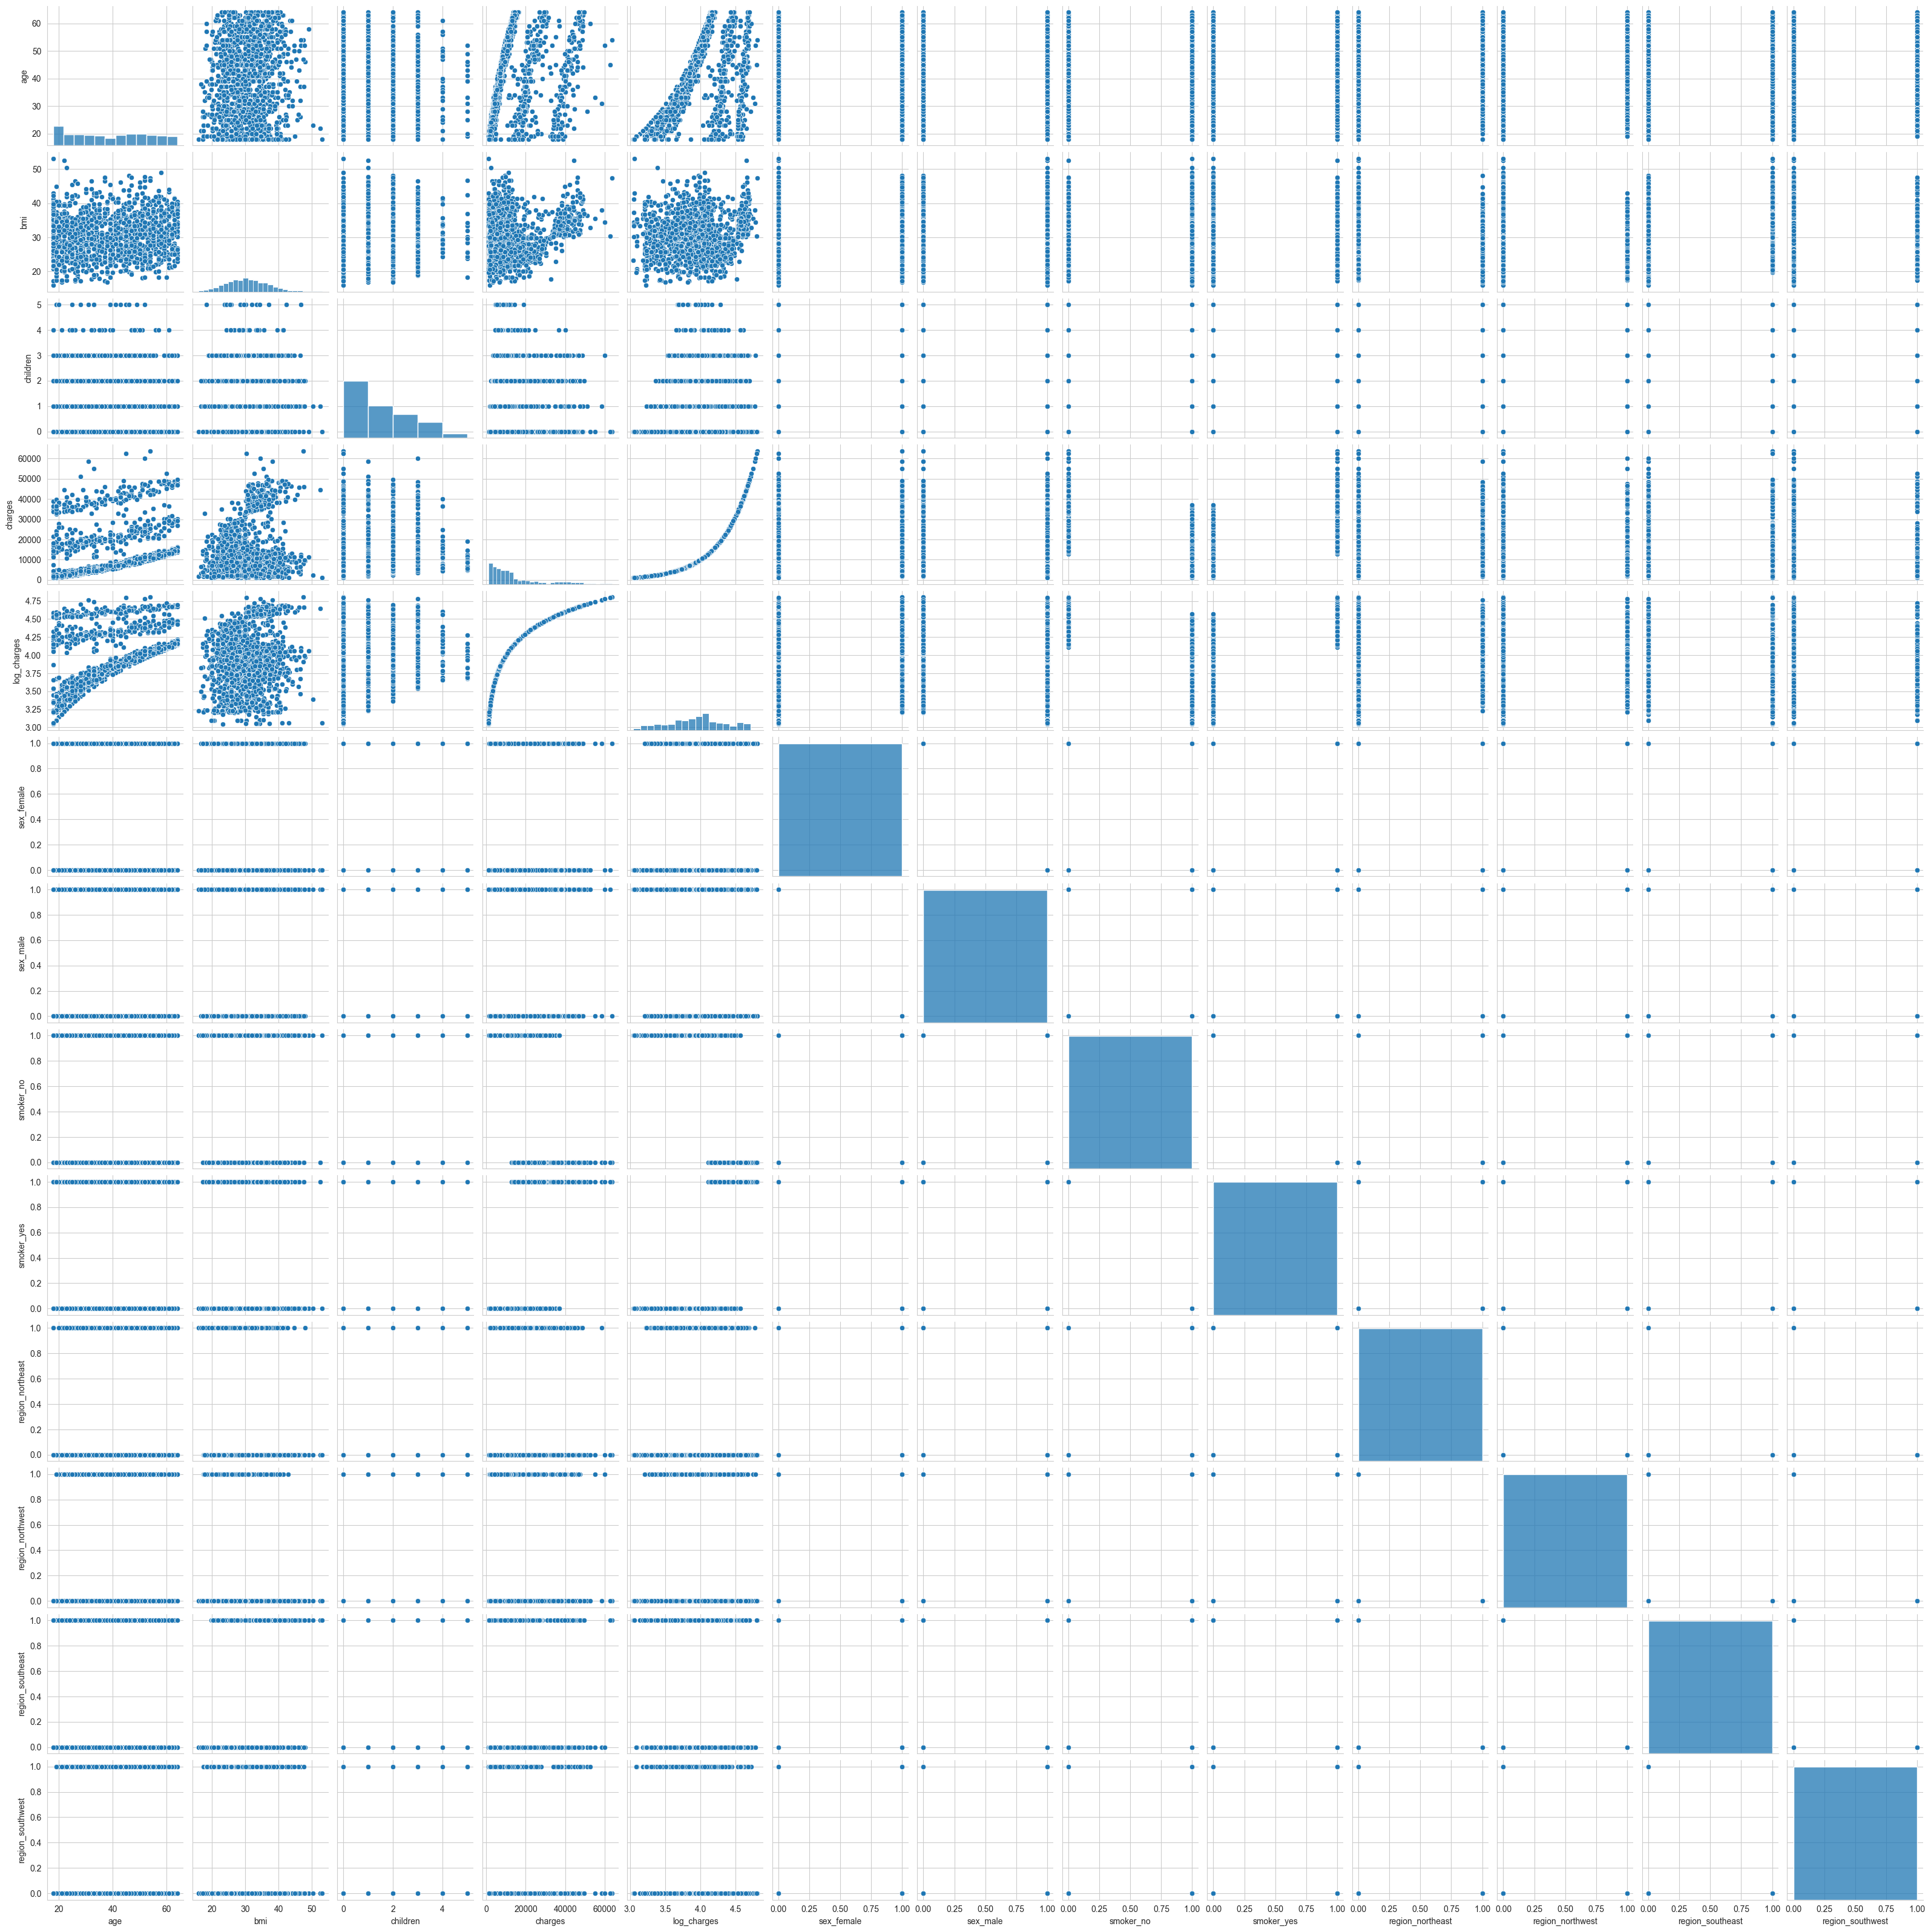

In [27]:
sns.pairplot(data_dummies)
plt.show()

# Data preprocessing

# Scaling the explanatory variables

We prepare the data for modeling by splitting it into training and test sets, and by scaling the features to optimize the performance of our models.


In [108]:
# Separate the explanatory variables and the target variable
X = data_dummies_1.drop(['charges'], axis=1)
y = data_dummies_1['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# Initialize and apply MinMaxScaler for feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# I. Linear Regression simple

# Simple Linear Regression Equation with Detailed Explanation.

# Prepare the Data for Simple Linear Regression: : 

X_train_lr = pd.DataFrame(X_train_scaled, columns=X.columns)[['smoker_yes']]
X_test_lr = pd.DataFrame(X_test_scaled, columns=X.columns)[['smoker_yes']]

# Train the Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_lr, y_train)

# Make Predictions on the Test Dataset
y_pred_lr = model_linear_regression.predict(X_test_lr)

# Evaluate the Model
print(f"R² Score: {r2_score(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")

R² Score: 0.6602486589056529
MSE: 52745964.72752624
RMSE : 7262.641718240426


In [56]:
def entrainer_et_evaluer_model(model):
    
    # Train the model on scaled training data
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on the scaled test set
    predictions = model.predict(X_test_scaled)
    
    # Evaluate the model
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    return model, r2, mse, rmse

# Linear regression multiple

In [57]:
linear_model, linear_r2, linear_mse, linear_rmse = entrainer_et_evaluer_model(LinearRegression())
print(f"Linear regression Multiple : \n R²: {linear_r2}\n MSE: {linear_mse}\n RMSE: {linear_rmse}")

Linear regression Multiple : 
 R²: 0.7835929767120722
 MSE: 33596915.851361476
 RMSE: 5796.284659276274


# Decision trees regression model

In [59]:
tree_model, tree_r2, tree_mse, tree_rmse = entrainer_et_evaluer_model(DecisionTreeRegressor(random_state=42, max_depth=4))
print(f"Decision tree regression\nR²: {tree_r2}\nMSE: {tree_mse}\nRMSE: {tree_rmse}")

Decision tree regression
R²: 0.8641310379678357
MSE: 21093484.004597444
RMSE: 4592.764309715603


# 5.3 Ensemble models

# 5.3.1 Random forest regression model

In [109]:
forest_model, forest_r2, forest_mse, forest_rmse = entrainer_et_evaluer_model(
               RandomForestRegressor(random_state=42, max_depth=5))

print(f"Random Forest Regression :\nR²: {forest_r2}\nMSE: {forest_mse}\nRMSE:{forest_rmse}")

Random Forest Regression :
R²: 0.8728607333078003
MSE: 19738209.87675829
RMSE:4442.770518129232


# Comment

We observe an improvement in our model's performance. This is explained by the fact that Random Forests, by aggregating the predictions of many decision trees, reduce the risk of overfitting and provide a more generalizable model. It would be relevant to test different values for the max_depth parameter in order to assess the impact on the results obtained


# 5.3.2 Stacking ensemble model

In [61]:
# Define the base models: these are models that have already been trained
base_models = [
    ('linear_regression', linear_model),
    ('random_forest', forest_model)
]

# Define the meta-learner
final_estimator = LinearRegression()

In [62]:
stacking_model, stacking_r2, stacking_mse, stacking_rmse = entrainer_et_evaluer_model(StackingRegressor
                            (estimators=base_models, final_estimator=final_estimator, cv=5,passthrough=False))
print(f"Stacking Regression:\nR²: {stacking_r2}\nMSE: {stacking_mse}\nRMSE : {stacking_rmse}")

Stacking Regression:
R²: 0.8749895693515314
MSE: 19407710.781415083
RMSE : 4405.418343519158


# Comment

The stacking model shows an improvement in terms of performance with an R² of 0.875, which indicates that the model explains approximately 87.5% of the variance in the data. Compared to individual models such as linear regression and random forest, the stacking model provides a better fit, as evidenced by the reduction in MSE to 19,407,710 and a decrease in RMSE to 4405.42.

This improvement can be attributed to the fact that stacking combines several base models (linear regression and random forest in this case), allowing it to capture a wider range of relationships in the data. By aggregating the predictions of the base models, the stacking model reduces the bias of some individual models while retaining their diversity, which contributes to better generalization

In [84]:
xgboost_model, xgboost_r2, xgboost_mse, xgboost_rmse = entrainer_et_evaluer_model(
    XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
)

print(f"XGBOOST MODEL : \n R²: {xgboost_r2}\n MSE: {xgboost_mse}\n RMSE: {xgboost_rmse}")


XGBOOST MODEL : 
 R²: 0.8837635299568553
 MSE: 18045564.527279753
 RMSE: 4248.007124203036


# Homoscédasticité (Residual Plot)

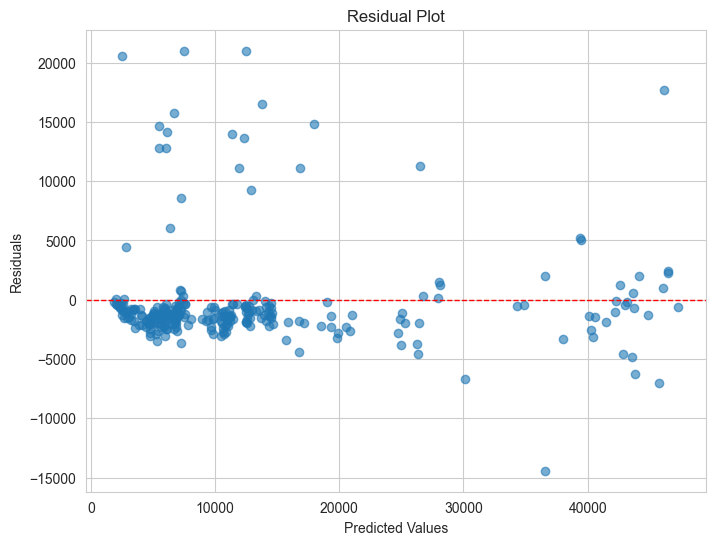

In [63]:
predictions = stacking_model.predict(X_test_scaled)
residuals = y_test - predictions

# Graphique des résidus

plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Error Independence - Durbin-Watson Test

In [110]:
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.198278868789454


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


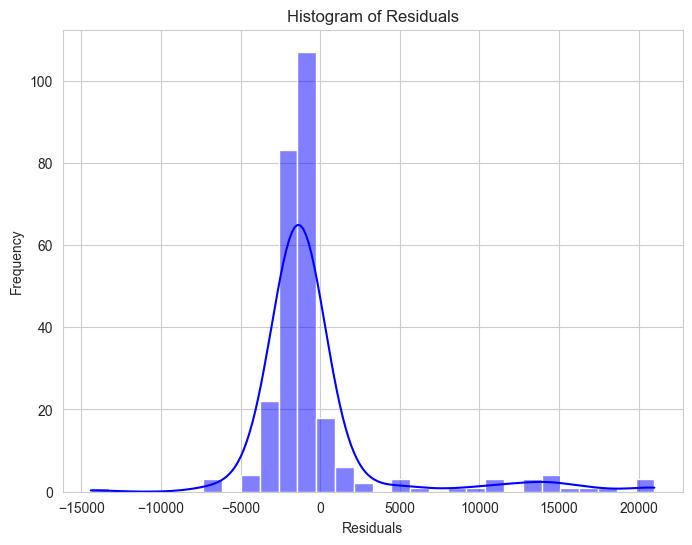

In [65]:
# The normality of errors Histogram

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


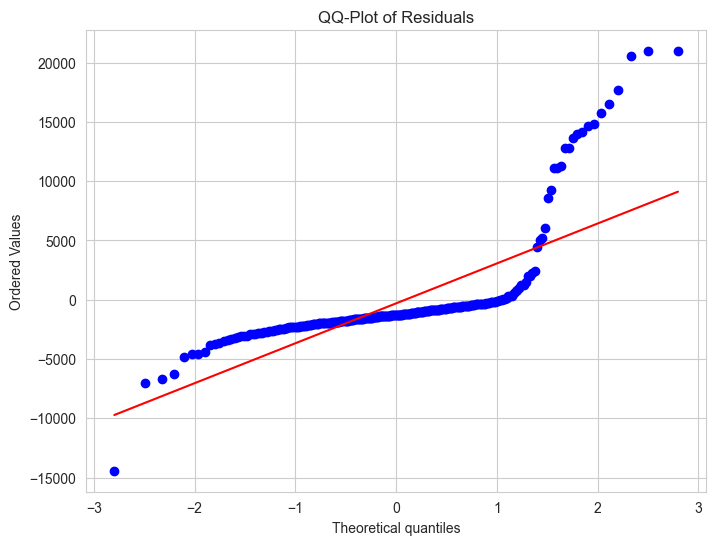

In [66]:
# 3b. Normalité des erreurs - QQ-Plot
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot of Residuals')
plt.show()

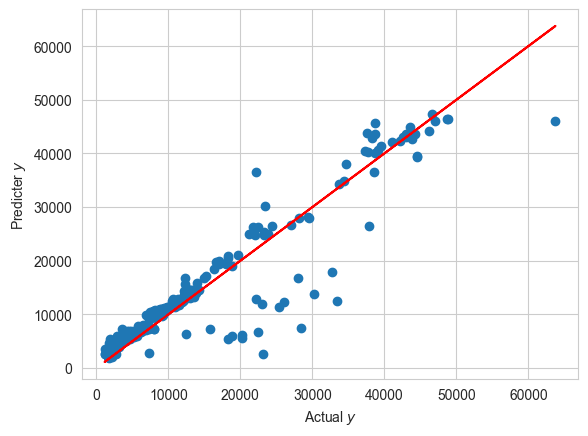

In [67]:
plt.scatter(y_test,predictions) 
plt.plot(y_test,y_test,"r")
plt.ylabel("Predicter $y$ ")
plt.xlabel("Actual $y$")
plt.show()


In [69]:
# Test the model on one individual client : 

new_data1 = {
    'age': 25,
    'bmi': 28.5,
    'children': 1,
    'sex_female': True,
    'sex_male': False,
    'smoker_no': True,
    'smoker_yes': False,
    'region_northeast': False,
    'region_northwest': True,
    'region_southeast': False,
    'region_southwest': False
}

new_data = pd.DataFrame([new_data1])


new_data

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,25,28.5,1,True,False,True,False,False,True,False,False


In [70]:
# Scale the new data :

X_train_scaled1 = scaler.fit_transform(new_data)

predictions = stacking_model.predict(X_train_scaled1)

print(" The predicted charges for this client are : ", predictions,  "Dollars")

 La prédiction des charges pour ce client est :  [11657.56401852] Dollars


In [71]:
# Perform a test for a group of 20 people :

data_offre_commercial = groupe_20_personnes = [
    {'age': 19, 'bmi': 27.900, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': False, 'region_southeast': False, 'region_southwest': True},
    {'age': 25, 'bmi': 31.250, 'children': 2, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 42, 'bmi': 28.880, 'children': 1, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': True, 'region_northwest': False, 'region_southeast': False, 'region_southwest': False},
    {'age': 35, 'bmi': 33.770, 'children': 3, 'sex_female': False, 'sex_male': True, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': True, 'region_southeast': False, 'region_southwest': False},
    {'age': 28, 'bmi': 24.600, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 51, 'bmi': 29.700, 'children': 2, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': True, 'region_northwest': False, 'region_southeast': False, 'region_southwest': False},
    {'age': 23, 'bmi': 26.400, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': True, 'region_southeast': False, 'region_southwest': False},
    {'age': 39, 'bmi': 32.100, 'children': 1, 'sex_female': False, 'sex_male': True, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': False, 'region_southeast': False, 'region_southwest': True},
    {'age': 45, 'bmi': 28.050, 'children': 2, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 31, 'bmi': 25.800, 'children': 0, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': True, 'region_northwest': False, 'region_southeast': False, 'region_southwest': False},
    {'age': 29, 'bmi': 30.400, 'children': 1, 'sex_female': True, 'sex_male': False, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': True, 'region_southeast': False, 'region_southwest': False},
    {'age': 48, 'bmi': 27.200, 'children': 3, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': False, 'region_southwest': True},
    {'age': 33, 'bmi': 29.900, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 37, 'bmi': 31.600, 'children': 2, 'sex_female': False, 'sex_male': True, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': True, 'region_southeast': False, 'region_southwest': False},
    {'age': 22, 'bmi': 24.100, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': True, 'region_northwest': False, 'region_southeast': False, 'region_southwest': False},
    {'age': 44, 'bmi': 28.300, 'children': 1, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 26, 'bmi': 32.900, 'children': 0, 'sex_female': True, 'sex_male': False, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': False, 'region_northwest': False, 'region_southeast': False, 'region_southwest': True},
    {'age': 41, 'bmi': 27.500, 'children': 2, 'sex_female': False, 'sex_male': True, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': True, 'region_southeast': False, 'region_southwest': False},
    {'age': 36, 'bmi': 30.800, 'children': 1, 'sex_female': True, 'sex_male': False, 'smoker_no': True, 'smoker_yes': False, 'region_northeast': False, 'region_northwest': False, 'region_southeast': True, 'region_southwest': False},
    {'age': 50, 'bmi': 26.700, 'children': 0, 'sex_female': False, 'sex_male': True, 'smoker_no': False, 'smoker_yes': True, 'region_northeast': True, 'region_northwest': False, 'region_southeast': False, 'region_southwest': False}
]

# Convert the group data into a DataFrame

offre_1 = pd.DataFrame(data_offre_commercial)

In [72]:
print(offre_1 )

    age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0    19  27.90         0        True     False      False        True   
1    25  31.25         2       False      True       True       False   
2    42  28.88         1        True     False       True       False   
3    35  33.77         3       False      True      False        True   
4    28  24.60         0        True     False       True       False   
5    51  29.70         2       False      True       True       False   
6    23  26.40         0        True     False       True       False   
7    39  32.10         1       False      True      False        True   
8    45  28.05         2        True     False       True       False   
9    31  25.80         0       False      True       True       False   
10   29  30.40         1        True     False      False        True   
11   48  27.20         3       False      True       True       False   
12   33  29.90         0        True     False     

In [112]:
train_scaled2 = scaler.fit_transform(offre_1)

predictions = stacking_model.predict(train_scaled2)

Average_charges = predictions.mean()
total_charge_of_the_group = predictions.sum()
print(" The sum of the charges to be predicted for this offer of 20 people is : ", round(total_charge_of_the_group,2),  "Dollars")

 The sum of the charges to be predicted for this offer of 20 people is :  414684.73 Dollars


# Sérialisation des objets

In [78]:
# Import pickle

import pickle

# Save the model in a Python file
prediction_model = "stacking_model.pkl"
with open(prediction_model,'wb') as file:
    pickle.dump(stacking_model,file)
    
    

In [79]:
# Restore the model as we would read a file
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LinearRegression from version 1.3.0 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
